<a href="https://colab.research.google.com/github/NitinSingh8/Machine-Learning-Project/blob/main/Classify_Country_by_Economical_Factor/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project** ===> classify country on basis of economical factor 

## Unsupervised Machine Learning


## In this project I will trying to see which country need financial support on the basis of economic factor.

## In this project we are going to use **Unsupervised Machine Learning** Algorithm to find the correct status of  country ans give them require financial support.

# Importing the dataset

In [ ]:
# Importing the necessary module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Projects_ML/finding-countries-in-need-of-financial-aid/finding_countries.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Let's understand the columns provided in this dataset.**

**Country** - Name of the Country

**child_mort** - Death of children under 5 years of age per 1000 live births

**exports** - Exports of goods and services per capita. Given as percentage of the GDP per capita

**health** - Total health spending per capita. Given as percentage of GDP per capita

**imports** - Imports of goods and services per capita. Given as percentage of the GDP per capita

**Income** - Net income per person

**Inflation** - The measurement of the annual growth rate of the Total GDP

**life_expec** - The average number of years a new born child would live if the current mortality patterns are to remain the same

**total_fer** - The number of children that would be born to each woman if the current age-fertility rates remain the same.

**gdpp** - The GDP per capita. Calculated as the Total GDP divided by the total population.

# Data Cleaning and Wrangling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Lets check first duplicate data

In [ ]:
df.shape

(167, 10)

In [ ]:
# df.duplicated(keep=False)  # means no duplicate row

df.loc[df.duplicated(keep=False),:] # we have no duplicate row so far

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [ ]:
# BUt if we got then we can remove by this line
df.drop_duplicates(keep = False,inplace = True)

Now Let see null value

In [ ]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df.isnull().value_counts() # no null value we found in any case

country  child_mort  exports  health  imports  income  inflation  life_expec  total_fer  gdpp 
False    False       False    False   False    False   False      False       False      False    167
dtype: int64

In [ ]:
# We don't have any null value so far but if we have then we can remove by dropping or imutation
# df.dropna(how='any',inplace = True)

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Data Analysis

Let see first the boxplot of every categorical column

In [ ]:
numerical = df.select_dtypes(np.number).columns
numerical 

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

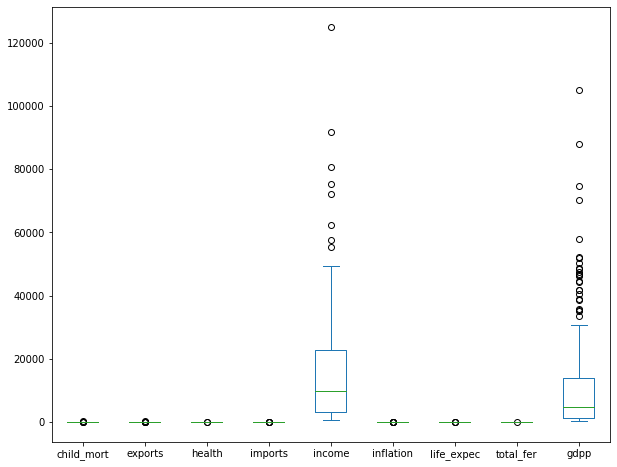

In [ ]:
# You can do by pandas help also
df[numerical].plot(kind = 'box',figsize=(10,8))

It is not giving right analysis. So Lets make first boxplot of income and gdpp then rest of other

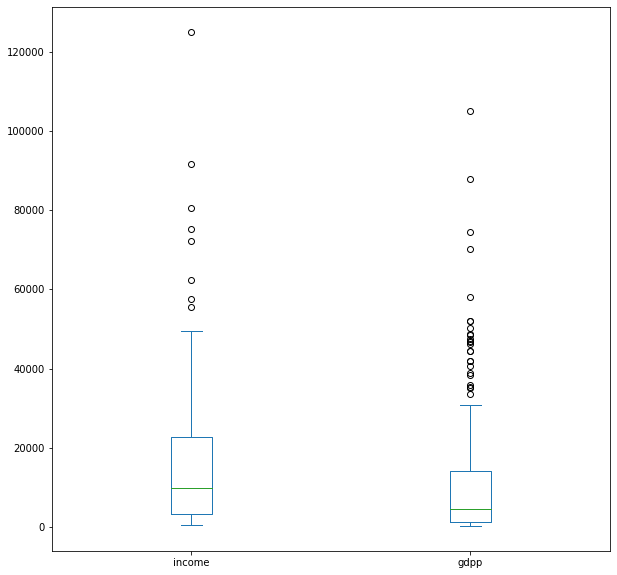

In [ ]:
df[['income','gdpp']].plot(kind='box',figsize=(10,10))

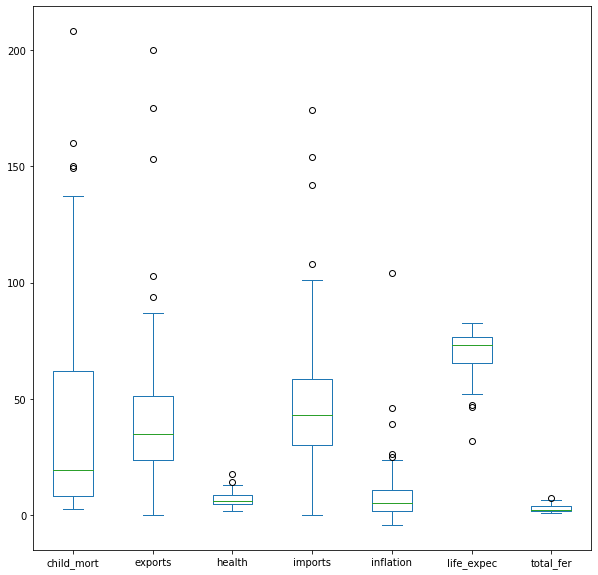

In [ ]:
df[['child_mort','exports','health','imports','inflation','life_expec','total_fer']].plot(kind='box',figsize=(10,10))

Here we can see that they are not having good outlier. So we have to handle this outlier but before that let see with histogram also.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc38060d750>,
      dtype=object)

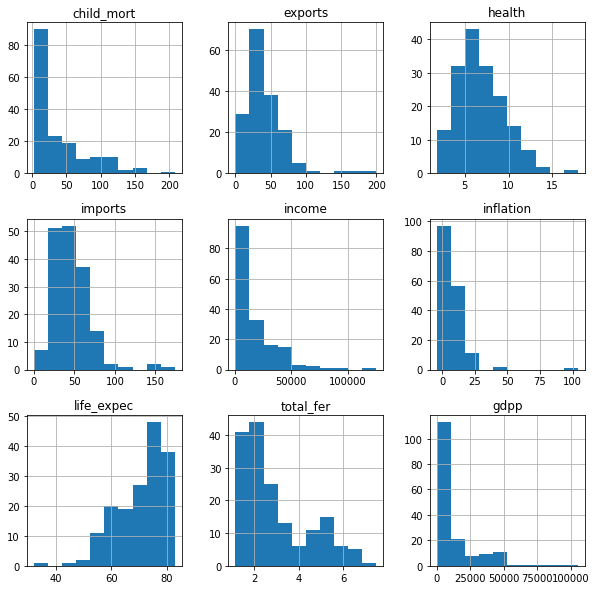

In [ ]:
df.hist(figsize=(10,10))

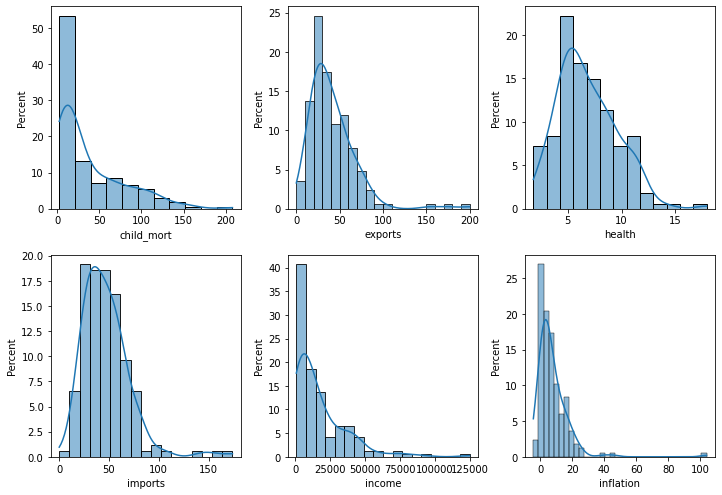

In [ ]:
plt.figure(figsize=(10,10))
for i in range(6):
  plt.subplot(3,3,i+1)
  sns.histplot(df[numerical[i]],kde= True,stat ='percent')
  plt.xlabel(numerical[i],size=10)
plt.tight_layout()
plt.show()


By this and above graph we come to know that they are highly right skewed. 

So we have to fix by either Standardization or Normalization

Here we are going to use standardization

# Data Standardization

Before moving to standardization , we have to remove the country column because it is no use for some time

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# df_without_country = df.drop('country',axis = 1)
        # or
df_without_country = df.iloc[:,1:]
df_without_country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(data = scaler.fit_transform(df_without_country) , columns = df_without_country.columns)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


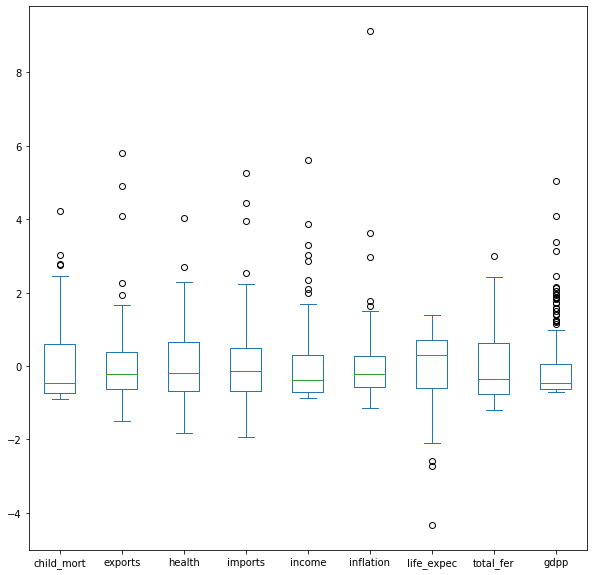

In [ ]:
df_scaled.plot(kind='box',figsize=(10,10))

After standardization they are looking in a good way. Now we can also handle outlier by standard deviation and z test but they are looking fine now 

# handle outlier (Optional)



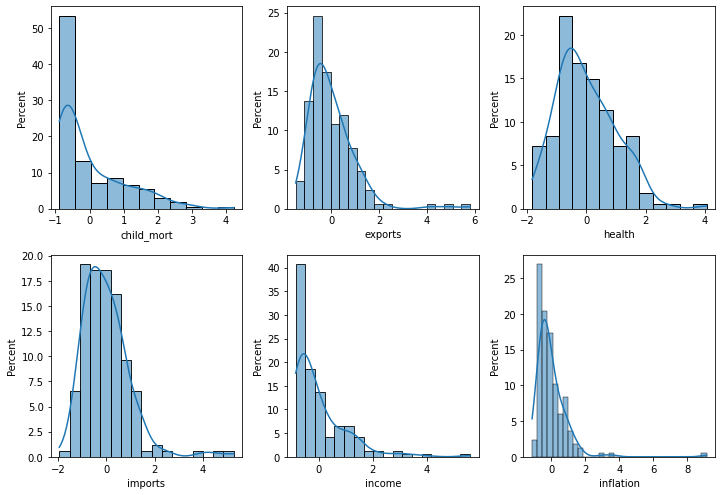

In [ ]:
numerical = df_scaled.select_dtypes(np.number).columns
plt.figure(figsize=(10,10))
for i in range(6):
  plt.subplot(3,3,i+1)
  sns.histplot(df_scaled[numerical[i]],kde= True,stat ='percent')
  plt.xlabel(numerical[i],size=10)
plt.tight_layout()
plt.show()


Still we need to handle this outlier. So we are going to use standard deviation formula

For Income

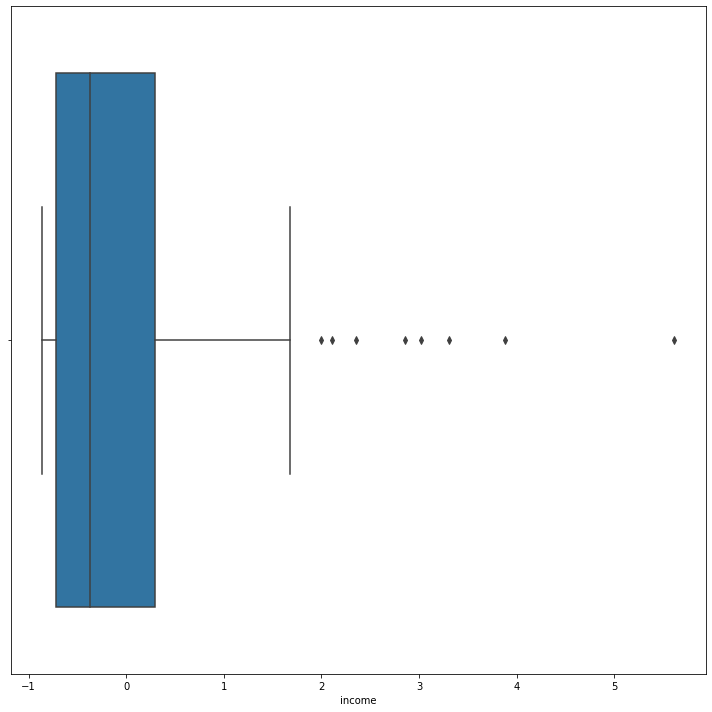

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = df_scaled['income'],data = df_scaled)
plt.tight_layout()
plt.show()

In [ ]:
income_mean = df_scaled.income.mean()
income_sd = df_scaled.income.std()

lower = income_mean - 3*income_sd
upper = income_mean + 3*income_sd 
print(lower,upper)

-3.0090225767630727 3.0090225767630727


In [ ]:
df[(df_scaled['income']>upper) |  (df_scaled['income']<lower) ] 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


In [ ]:
df_scaled = df_scaled[(df_scaled['income']>lower) & (df_scaled['income']<upper)]
# df_scaled.head()
df_scaled.shape

(163, 9)

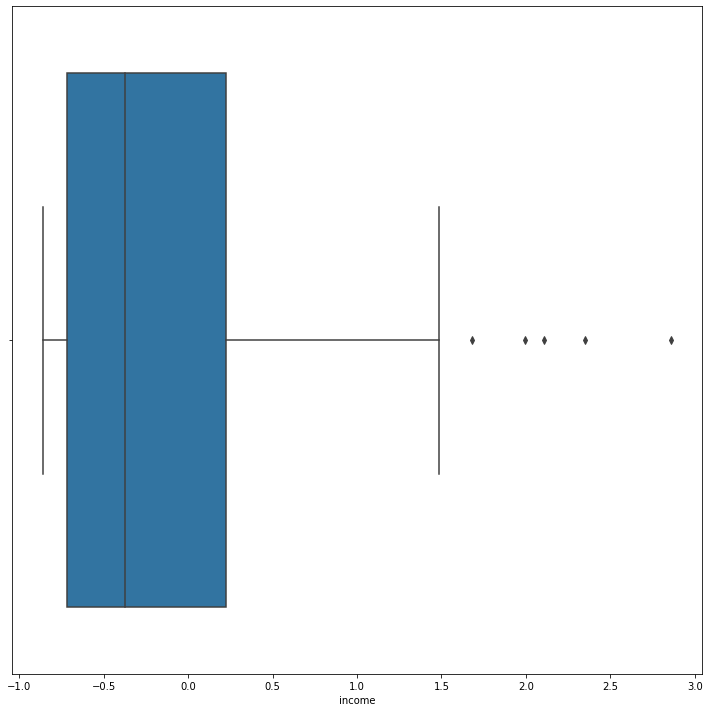

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = df_scaled['income'],data = df_scaled)
plt.tight_layout()
plt.show()

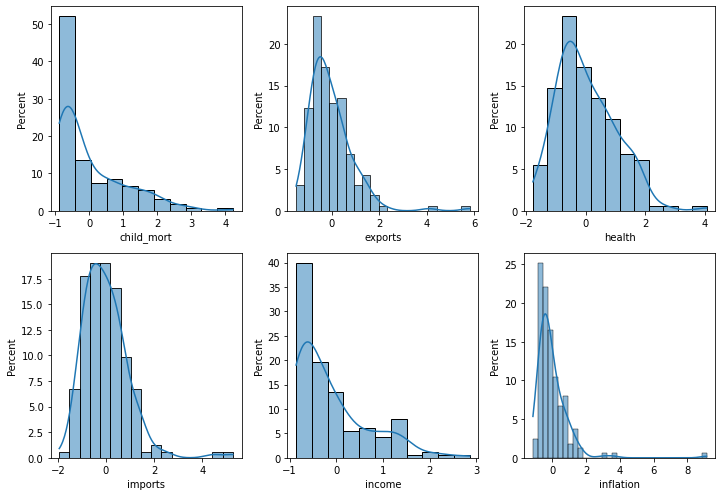

In [ ]:
numerical = df_scaled.select_dtypes(np.number).columns
plt.figure(figsize=(10,10))
for i in range(6):
  plt.subplot(3,3,i+1)
  sns.histplot(df_scaled[numerical[i]],kde= True,stat ='percent')
  plt.xlabel(numerical[i],size=10)
plt.tight_layout()
plt.show()


# Let's do clustering

In [ ]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc376c87c90>,
      dtype=object)

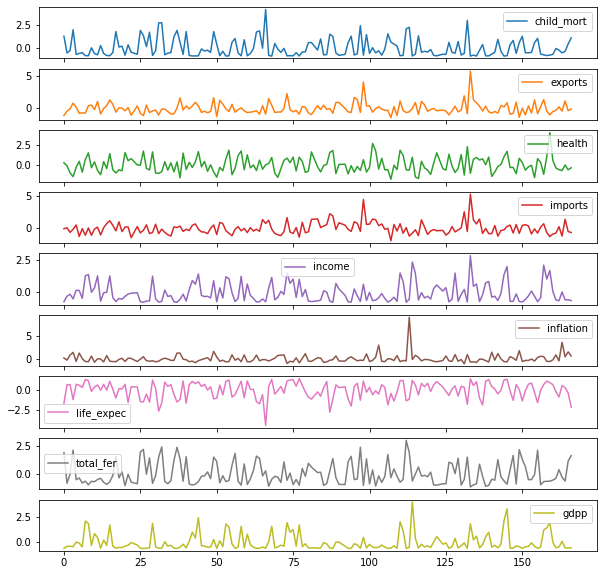

In [ ]:
df_scaled.plot(kind='line',figsize=(10,10), subplots = True)

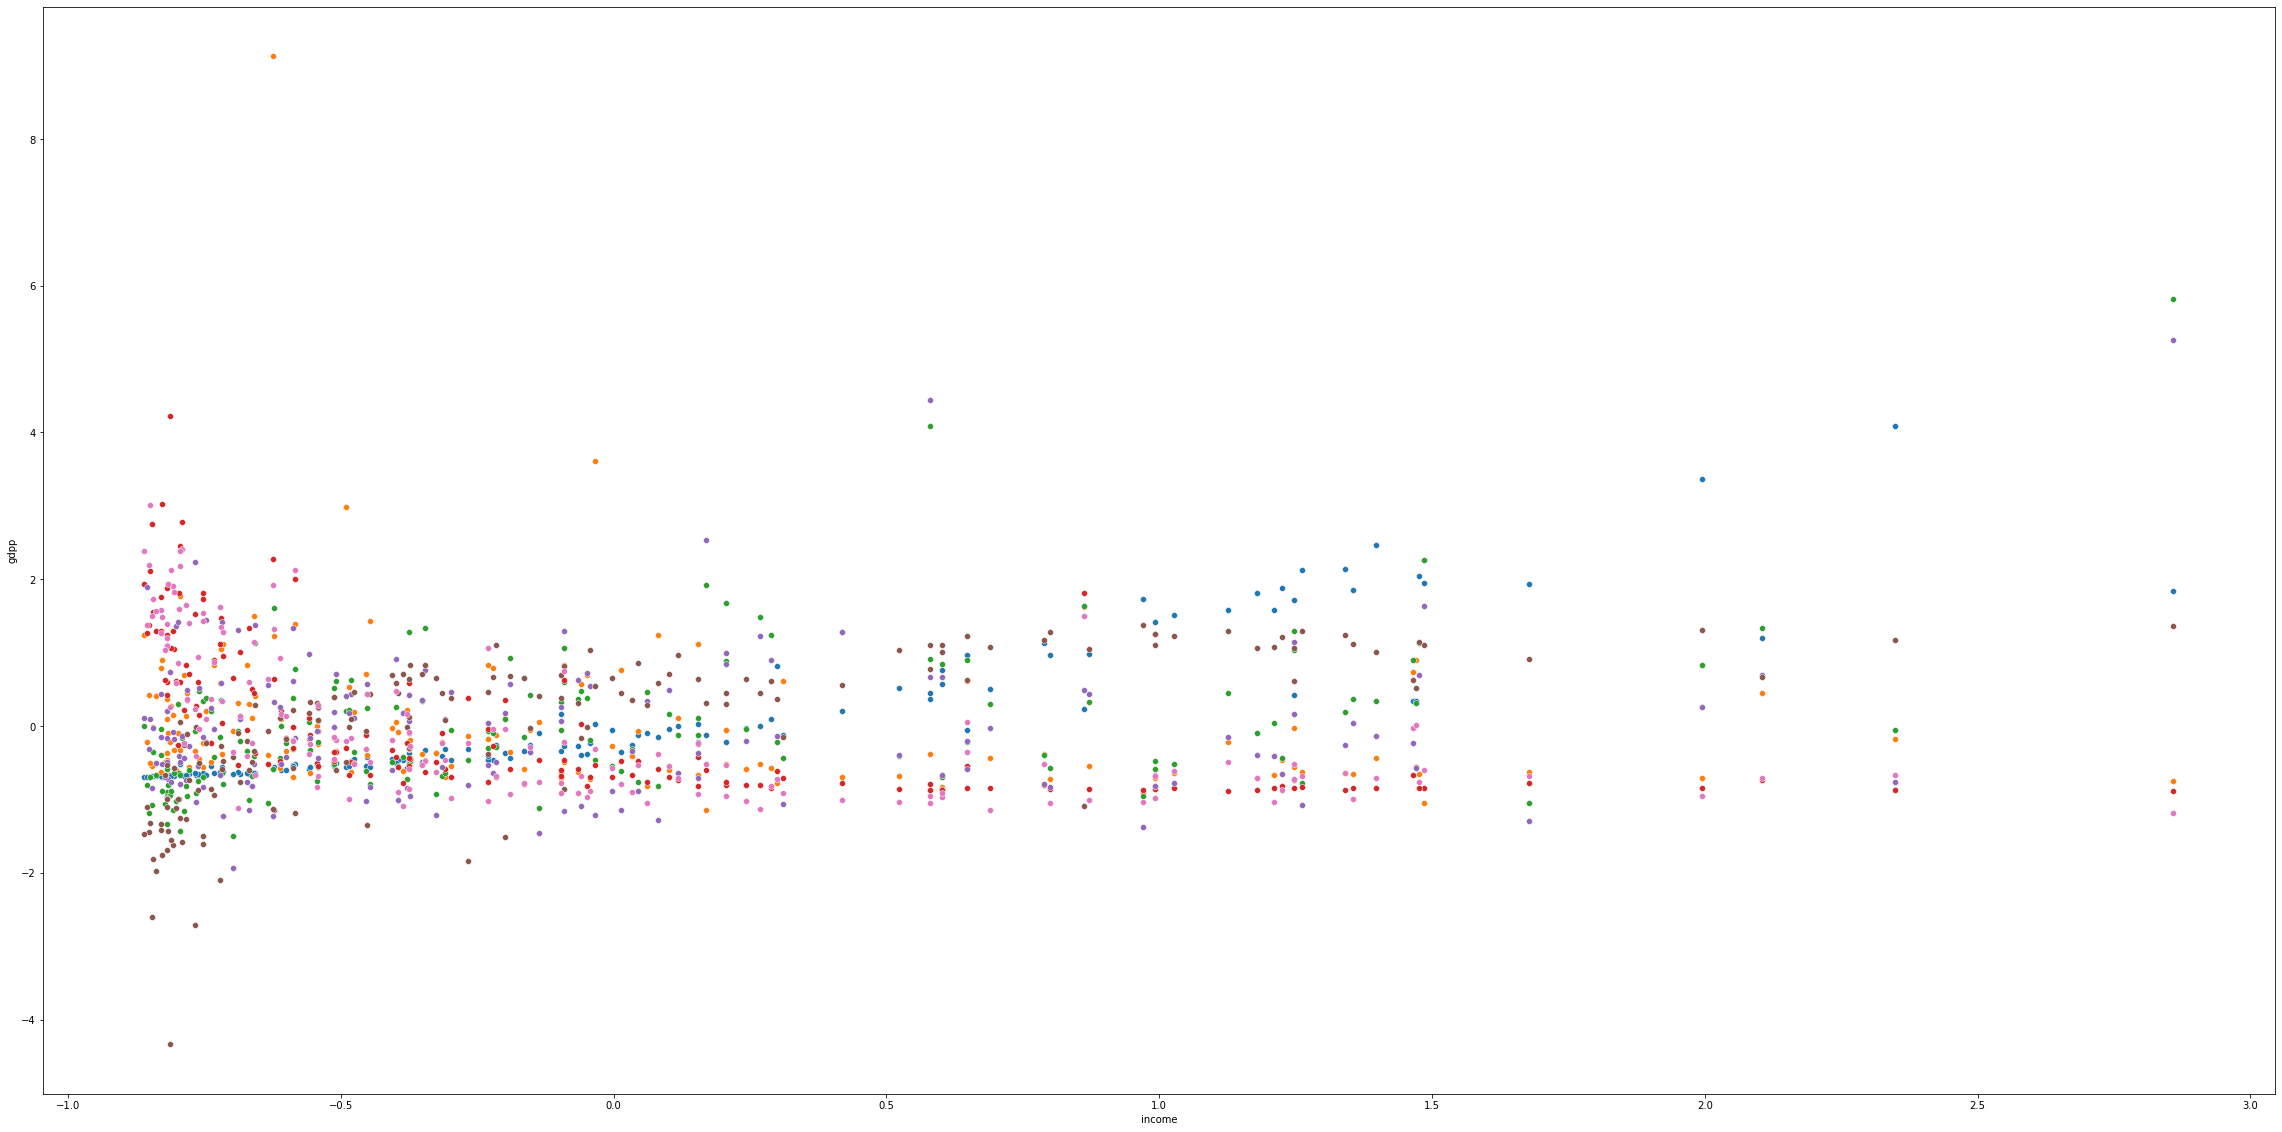

In [ ]:
plt.figure(figsize=(40,20))
sns.scatterplot(x=df_scaled['income'], y = df_scaled['gdpp'])
sns.scatterplot(x=df_scaled['income'], y = df_scaled['inflation'])
sns.scatterplot(x=df_scaled['income'], y = df_scaled['exports'])
sns.scatterplot(x=df_scaled['income'], y = df_scaled['child_mort'])
sns.scatterplot(x=df_scaled['income'], y = df_scaled['imports'])
sns.scatterplot(x=df_scaled['income'], y = df_scaled['life_expec'])
sns.scatterplot(x=df_scaled['income'], y = df_scaled['total_fer'])

plt.show()

# K means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,silhouette_score

[0.28735668921406704, 0.28329575683463126, 0.301375962376881, 0.30475221266676467, 0.22799367131601095, 0.2500648781112541, 0.21088407876830742, 0.22882837709354947]
[1050.2145582853307, 831.4244352086876, 700.3229986404376, 628.806642256443, 551.6707582781798, 496.0771723377997, 464.5004286417757, 424.31307485248954]


Text(0, 0.5, 'shilhouette score')

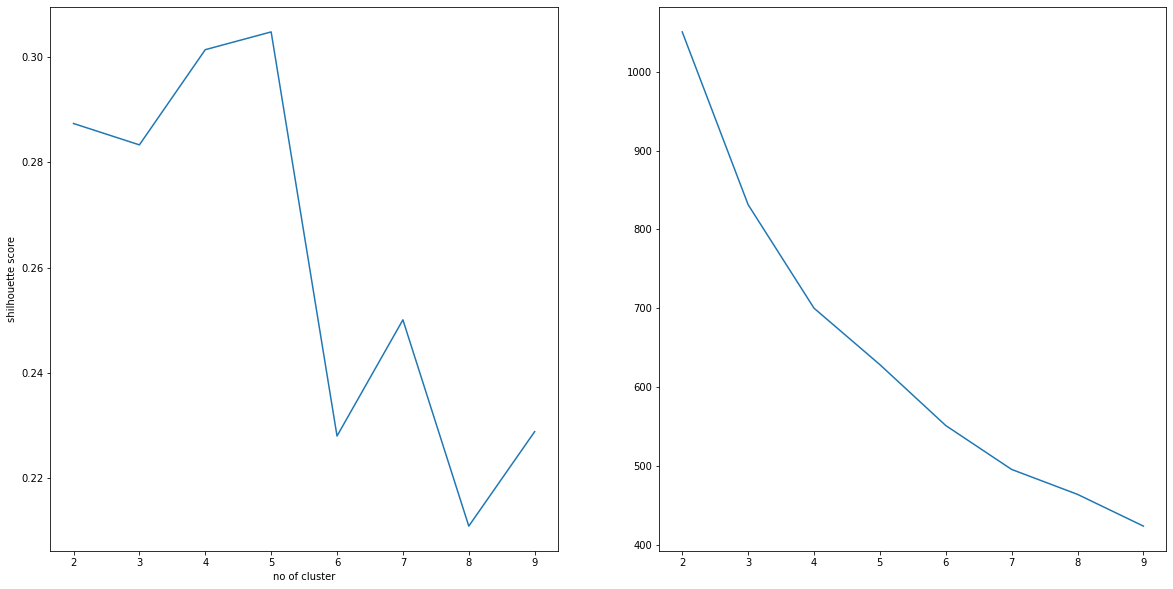

In [ ]:
def K_means_cluster(n):
  model = KMeans(n_clusters=  n , random_state=24)

  classify_data = model.fit(df_scaled)


  KM_labels = classify_data.labels_
  class_label = list(KM_labels)

  # shilhouette score
  score = silhouette_score(df_scaled,KM_labels)
  inertia = classify_data.inertia_

  return score,inertia, class_label

score,inertia = [],[]

for i in range(2,10):
  a , b , c = K_means_cluster(i)
  score.append(a)
  inertia.append(b)


print(score)
print(inertia)

fig,ax = plt.subplots(1,2,figsize=(20,10))

sns.lineplot(x=range(2,10), y = score, ax = ax[0])
ax[0].set_xlabel('no of cluster')
ax[0].set_ylabel('shilhouette score')

sns.lineplot(x=range(2,10), y = inertia, ax=  ax[1])
ax[0].set_xlabel('no of cluster')
ax[0].set_ylabel('shilhouette score')


From here we can easily find that 5 cluster are fitting good for our data

In [ ]:
score,inertia ,class_label = K_means_cluster(5)

df_scaled['class'] = class_label

print(f"shilhouette Score and inertia for our 5 cluster is {score} and {inertia} respectively. ")

shilhouette Score and inertia for our 5 cluster is 0.30475221266676467 and 628.806642256443 respectively. 


In [ ]:
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,3
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,3
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,3
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,3
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,3
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


In [ ]:
df_scaled['class'].value_counts()   

3    83
1    48
4    30
2     3
0     3
Name: class, dtype: int64

# lets classify the data on basis of class

In [ ]:
df['class'] = df_scaled['class']

In [ ]:
px.choropleth(df, locationmode='country names',locations='country', color='class',
                           color_continuous_scale="Plasma",
                           labels={'unemp':'unemployment rate'}
                          )

In [ ]:
df[df['class']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650,0
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500,0


In [ ]:
df[df['class']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1


In [ ]:
df[df['class']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2


In [ ]:
df[df['class']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,3
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,3
...,...,...,...,...,...,...,...,...,...,...,...
156,Ukraine,11.7,47.1,7.72,51.1,7820,13.40,70.4,1.44,2970,3
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,3
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,3
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3


In [ ]:
df[df['class']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,4
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,4
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,4
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,4
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,4
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,4
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,4
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,4
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,4
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,4


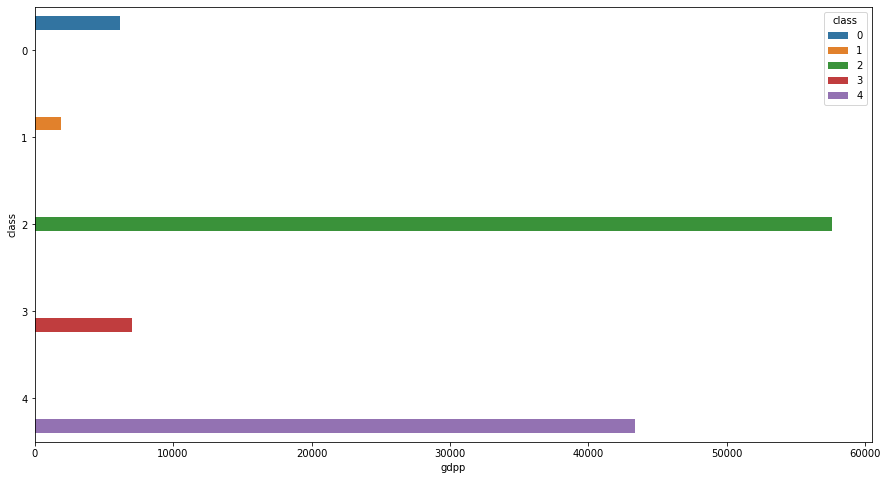

In [ ]:

fig, ax = plt.subplots(figsize=(15,8))
df_bar = df.groupby('class').mean().reset_index()
fig = sns.barplot(x='gdpp', y='class',data=df_bar, hue='class',orient='h')

In [ ]:
#creating a dataframe that has only mean values of each feature for all classes
polar= df_scaled.groupby('class').mean().reset_index()
print(polar)

polar = pd.melt(polar,id_vars=["class"])
polar

   class  child_mort   exports    health   imports    income  inflation  \
0      0    0.484065 -0.278413 -0.611878 -0.676287 -0.382826   5.242572   
1      1    1.292620 -0.441377 -0.163124 -0.170610 -0.690788   0.200143   
2      2   -0.849003  4.935673 -0.008163  4.548058  2.439542  -0.504206   
3      3   -0.434852  0.024526 -0.193803  0.065845 -0.203380  -0.114173   
4      4   -0.828609  0.172621  0.859190 -0.296373  1.462275  -0.478189   

   life_expec  total_fer      gdpp  
0   -0.359671   0.465138 -0.372346  
1   -1.261473   1.306997 -0.606493  
2    1.226824  -1.038863  2.440797  
3    0.297828  -0.459087 -0.324708  
4    1.107649  -0.763681  1.661902  


,class,variable,value
0,0,child_mort,0.484065
1,1,child_mort,1.292620
2,2,child_mort,-0.849003
3,3,child_mort,-0.434852
4,4,child_mort,-0.828609
5,0,exports,-0.278413
6,1,exports,-0.441377
7,2,exports,4.935673
8,3,exports,0.024526
9,4,exports,0.172621


In [ ]:
%%capture
fig = px.line_polar(polar, r="value", theta="variable", color="class", line_close=True, template="plotly_dark")

In [ ]:
fig.show()

# Provide the name to class label


0 - First Priority Nations

1 - Second Priority Nations

2 - Very Well Developed

3 - Developing Nations

4 - Well Developed

In [ ]:
df['class_name'] = df['class'].astype(str)

df['class_name'] = df['class_name'].replace({'0':'First Priority Nations' , '1': 'Second Priority Nations' , '2' : 'Very Well Developed'  , '3' : 'Developing Nations' , '4': 'Well Developed'})

df['class_name'].value_counts()

Developing Nations         83
Second Priority Nations    48
Well Developed             30
Very Well Developed         3
First Priority Nations      3
Name: class_name, dtype: int64

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,class_name
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Second Priority Nations
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,Developing Nations
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,Developing Nations
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Second Priority Nations
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,Developing Nations
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,Developing Nations
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,First Priority Nations
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3,Developing Nations
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,Second Priority Nations


In [ ]:
df_scaled['class_name'] = df['class_name']
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,class_name
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1,Second Priority Nations
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,3,Developing Nations
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,3,Developing Nations
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1,Second Priority Nations
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,3,Developing Nations
...,...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,3,Developing Nations
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0,First Priority Nations
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,3,Developing Nations
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1,Second Priority Nations
